# Module 1 Practice: John Snow's Cholera Map 

In this practice, we will load the data for John Snow's cholera map from `/dsa/data/all_datasets/CholeraDeathsPumps.csv`. It has the number of deaths and geographical coordinates of the deaths and water pumps (where count is -999). 

We will do simple scatter plots using the **`ggplot2`** library; it has many useful functions to create nice plots and graphics. Here is a handy [cheatsheet for ggplot2 library](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf), and the [full documentation](https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf).

**The following are examples to start using ggplot for simple plots:** 

In [1]:
# load ggplot library 
library(ggplot2)

# First, make up a data frame 
df <- data.frame(replicate(3,sample(0:100,10,rep=TRUE)))
df
str(df)

X1,X2,X3
84,68,50
81,3,29
69,9,41
11,5,14
66,76,53
95,38,73
81,37,78
93,87,81
36,2,39
23,77,82


'data.frame':	10 obs. of  3 variables:
 $ X1: int  84 81 69 11 66 95 81 93 36 23
 $ X2: int  68 3 9 5 76 38 37 87 2 77
 $ X3: int  50 29 41 14 53 73 78 81 39 82


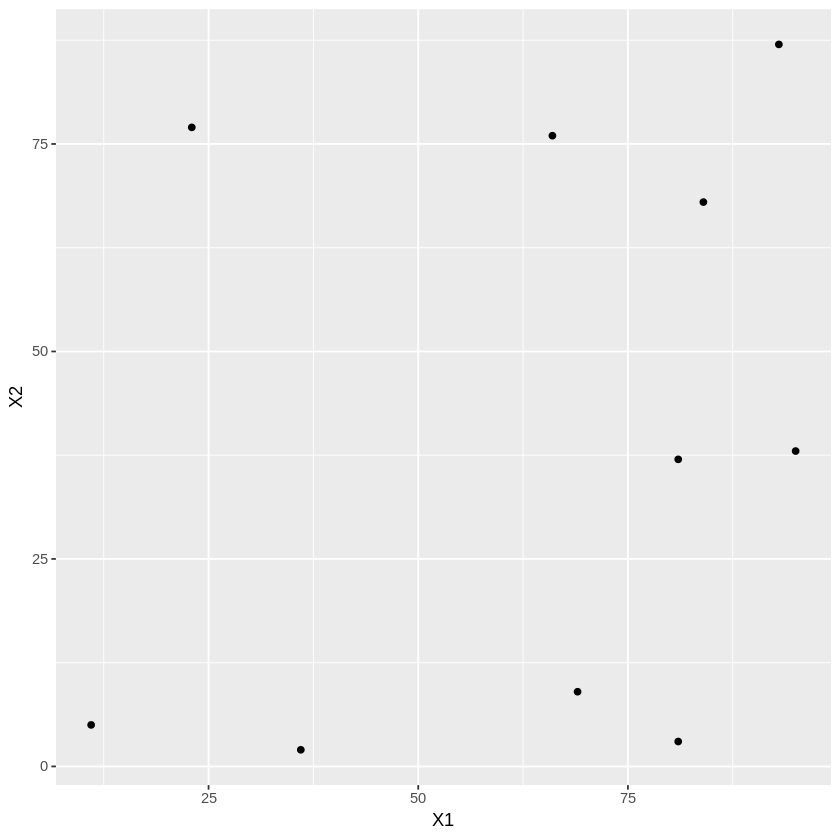

In [2]:
# every ggplot "object" should define the data frame to be used for plotting, 
# and the "aesthetics" that is the mapping between the columns of the data set and the plot. 
plot1 <- ggplot(data=df, mapping=aes(x=X1, y=X2))

# now add a "geom" to tell what type of plot it'll be: here, it's a scatter plot. 
plot1 <- plot1 + geom_point()

# display it. 
plot1

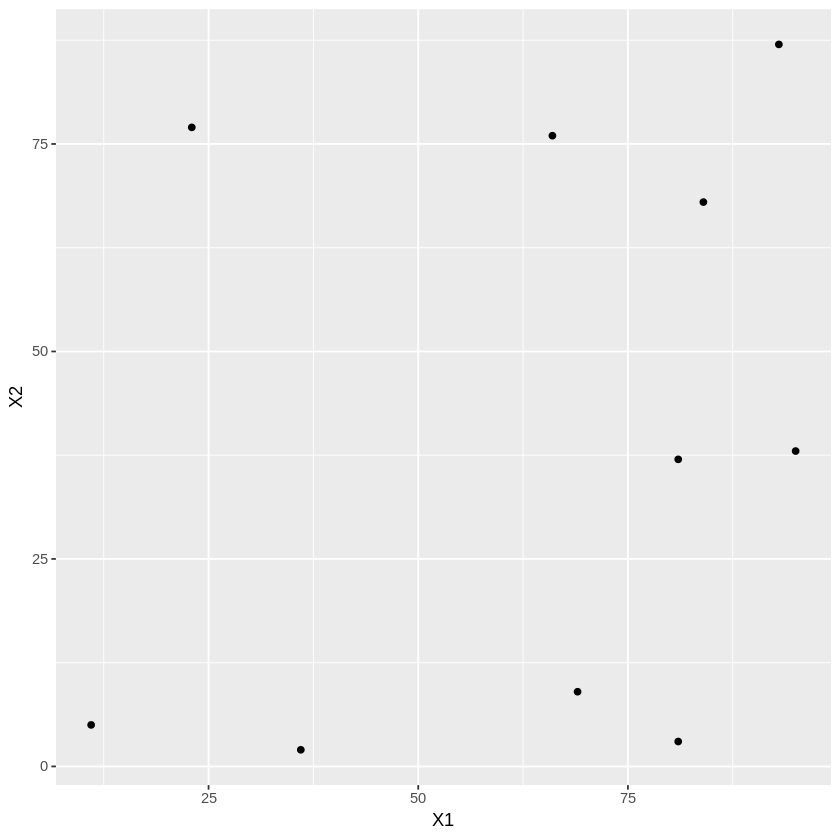

In [3]:
# The following is same as above, relying on defaults and doing everything in one line: 

ggplot(df, aes(X1, X2)) + geom_point() 


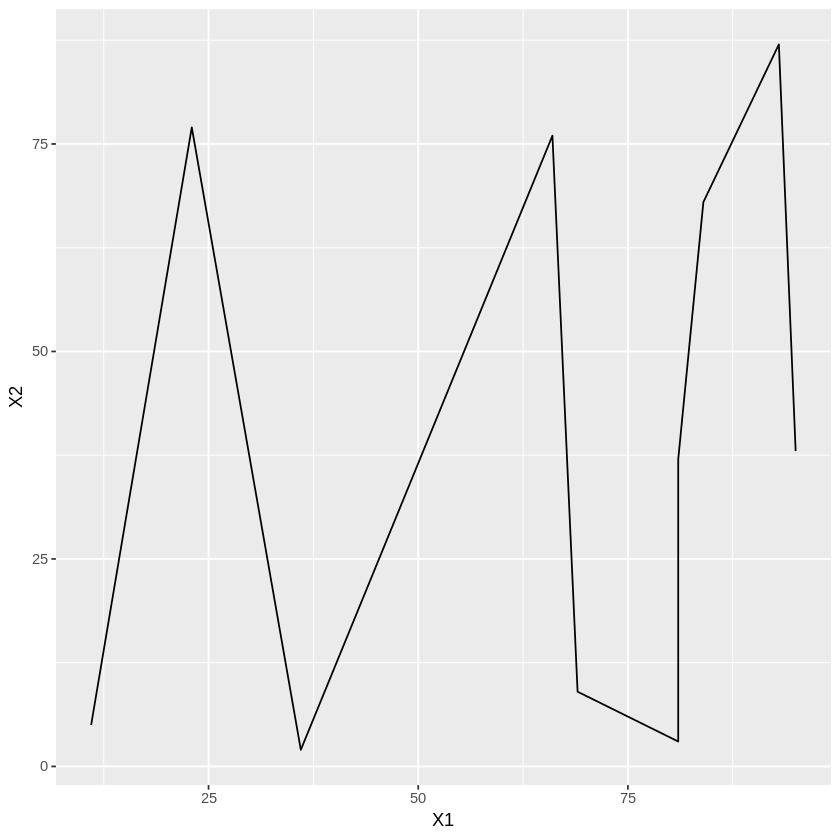

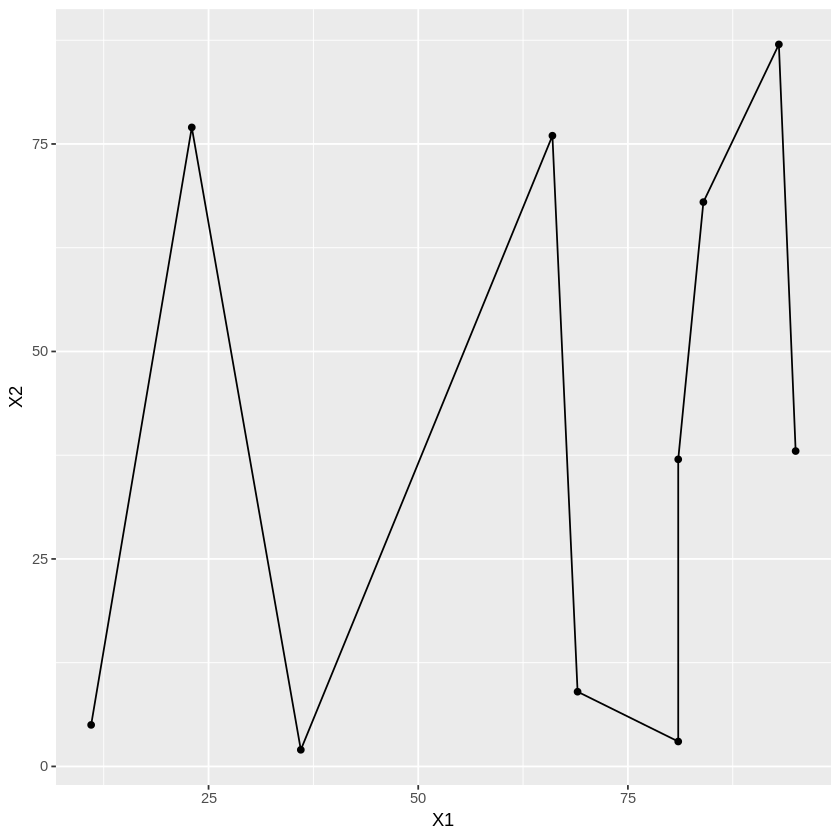

In [4]:
# Let's do a line plot: 

p1 <- ggplot(df, aes(x=X1,y=X2)) + geom_line() 
p1

# or both, we can keep adding different layers like this: 

p1 <- p1 + geom_point()
p1


**Now, we will do the following activities:** 

In [5]:
# Activity 1: read the Cholera data, show head and tail 

df <- read.csv("/dsa/data/all_datasets/CholeraDeathsPumps.csv",header=TRUE, sep=",")
head(df)
tail(df)

count,long,lat
3,-0.137930,51.51342
2,-0.137883,51.51336
1,-0.137853,51.51332
1,-0.137812,51.51326
4,-0.137767,51.51320
2,-0.137537,51.51318


,count,long,lat
253,-999,-0.139671,51.51491
254,-999,-0.131630,51.51235
255,-999,-0.133594,51.51214
256,-999,-0.135919,51.51154
257,-999,-0.133962,51.51002
258,-999,-0.138199,51.51129


In [6]:
# Activity 2: separate deaths and pumps to separate data frames 

wpumps <- subset(df,count==-999,)
cdeaths <- subset(df,count!=-999,)

head(wpumps)

,count,long,lat
251,-999,-0.136668,51.51334
252,-999,-0.139586,51.51388
253,-999,-0.139671,51.51491
254,-999,-0.131630,51.51235
255,-999,-0.133594,51.51214
256,-999,-0.135919,51.51154


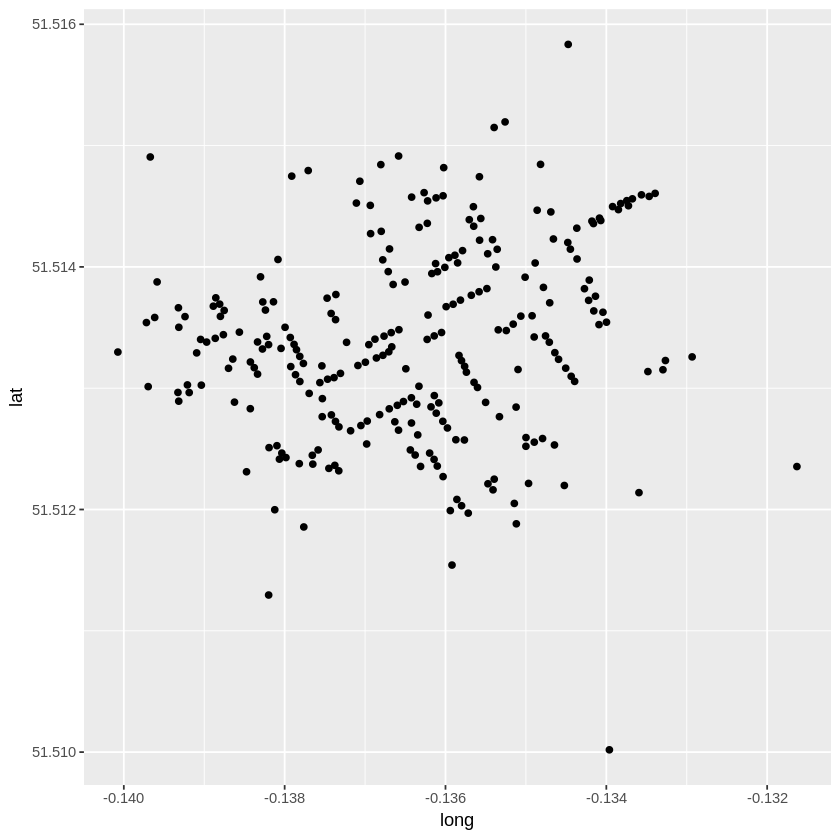

In [7]:
# Activity 3: plot all data points as a scatter plot; define aesthetics

ggplot(data=df, aes(long,lat)) +  geom_point()


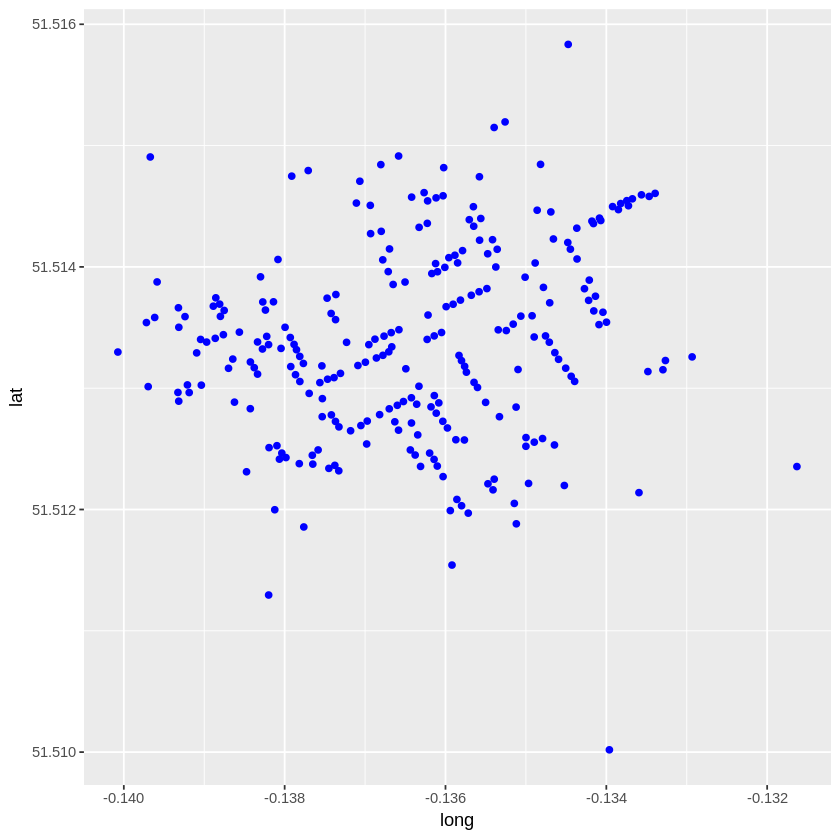

In [8]:
# Activity 4: change color of the points to blue 

ggplot(data=df, aes(long,lat)) +  geom_point(color='blue')

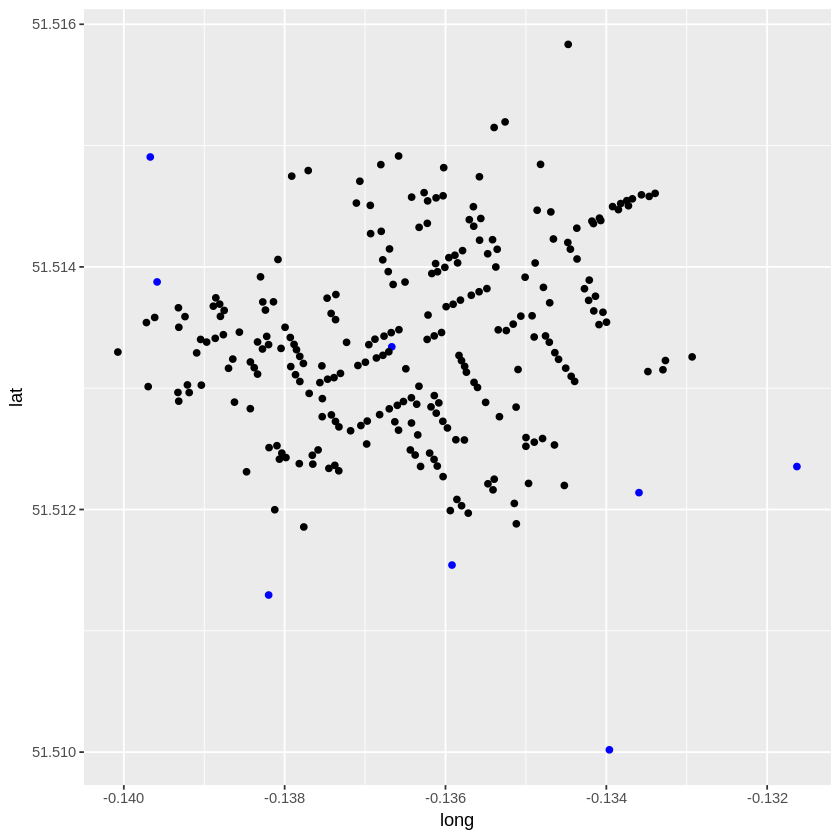

In [9]:
# Activity 5: plot deaths and pumps separately on the same plot (pumps: blue, deaths: black)

ggplot(data=cdeaths,aes(x=long,y=lat)) + geom_point(aes(x=long,y=lat),data=wpumps,color='blue') + geom_point() 


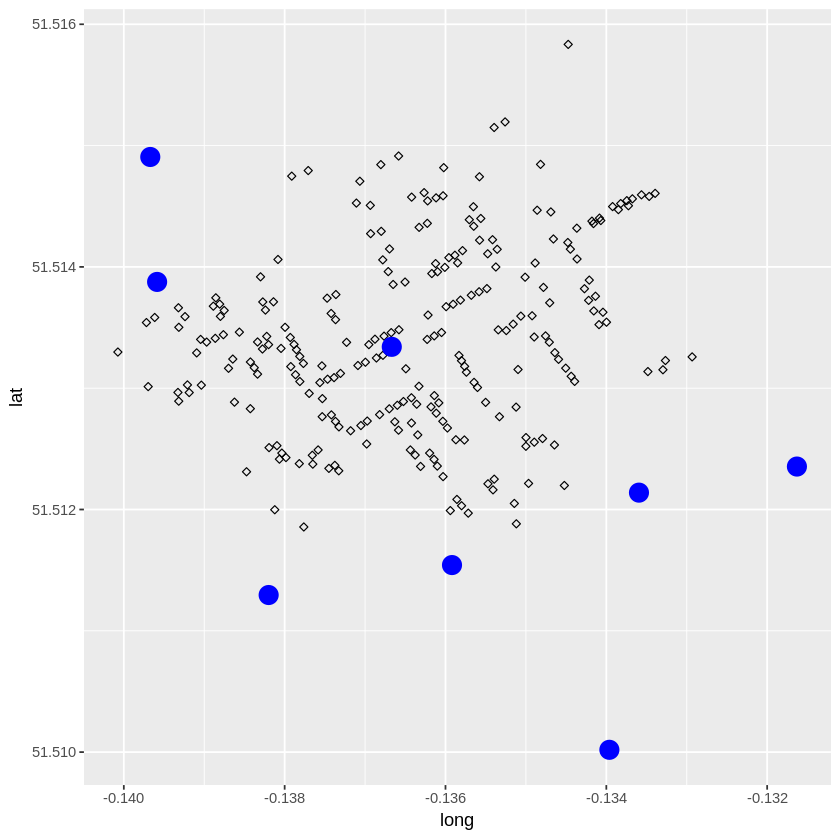

In [10]:
# Activity 6: Make pumps bigger, change the shape of deaths to diamond (hint: use shape=23)
ggplot(data=cdeaths,aes(x=long,y=lat))  + geom_point(shape=23) + geom_point(aes(x=long,y=lat),data=wpumps,color='blue',size=5)



### Question: Does this plot show counts of deaths ? How do we incorporate that column to this plot ? 


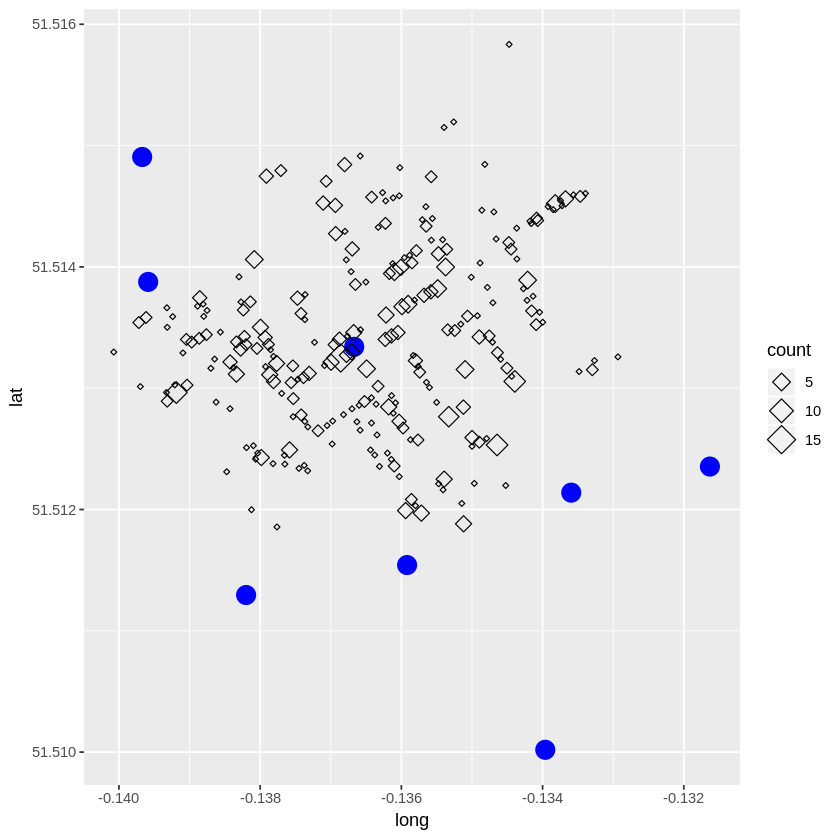

In [35]:
# Activity 7: FIND a way of showing number of deaths in the plot above

ggplot(data=cdeaths, aes(long,lat)) +  
  geom_point(data=wpumps,aes(long,lat),color='blue',size=5) + 
  geom_point(data=cdeaths,aes(long,lat,size=count),shape=23) 
